# Assignment 1 
## Task 1 (Affine Transformation)
### Ari Purnama Aji_1313617008_Sistem Pakar 112
Pada task ini akan dilakukan operasi trasnformasi affine pada sebuah bangun dua dimensi dengan menggunakan beberapa operasi matriks affine.

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

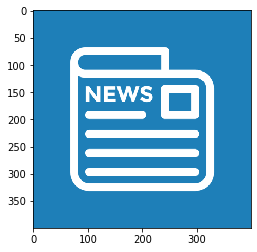

In [11]:
# Melakukan input gambar 
img = Image.open('picture.png')

# Mendapatkan bentuk matriks dari gambar
G = np.array(img)
plt.imshow(img)
plt.show()

Berikut merupakan gambar sampel beresolusi 400x400 pixel yang akan dipakai pada operasi transformasi affiine 2D

In [12]:
G.shape

(400, 400, 3)

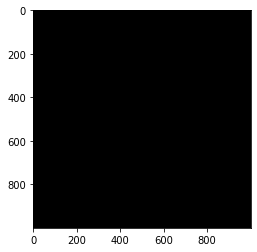

In [13]:
# Membuat matriks 3D dengan ukuran 1000x1000 yang setiap element matriksnya bernilai 0
canvasKosong = np.zeros((1000, 1000, 3), dtype='uint8')
plt.imshow(canvasKosong)
plt.show()

Disini juga telah disiapkan gambar canvasKosong yang ukurannya lebih bersar dari gambar sampelnya yang digunakan sebagai wadah untuk menaruh gambar sampel, sehingga gambar sampel seperti terletak pada diagram kartesian.

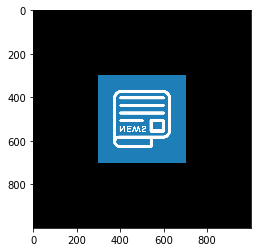

In [14]:
# Membuat gambar canvasAwal yang terlihat juga bentuk gambar sampelnya
canvasAwal = canvasKosong.copy()
canvasAwal[300:700, 300:700] += np.flip(G, 0) 
plt.imshow(canvasAwal)
plt.show()

Selanjutnya tersedia juga gambar canvasAwal yang telah terlihat juga gambar sampelnya. Namun gambar canvasAwal ini dibalik, hal ini bertujuan untuk menyamakan mapping array di komputer yang berbeda dengan diagram kartesian, sehingga ketika melakukan operasi transformasi, titik(x, y) dapat berpindah dengan arah sumbu seperti pada diagram kartesian.

### 1. Scaling
Transformasi Affine untuk skala melakukan penskalaan dengan menggunakan dua faktor skala yaitu Sx dan Sy masing-masing untuk koordinat x dan y. Persamaan transformasinya diberikan pada persamaan berikut ini. (Qx, Qy) = (Sx * Px, Sy * Py).<br/>
Sehingga matriks untuk transformasi skala adalah: <br/>
[Sx, 0, 0]<br/>
[0, Sy, 0]<br/>
[0, 0, 1]<br/>

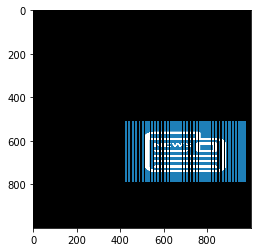

In [15]:
# Membuat gambar canvasScaling sebagai wadah khusus untuk melakukan operasi scaling 
canvasScaling = canvasKosong.copy()

# Menentukan besaran skala
Sx = 1.4   # skala untuk koordinat x
Sy = 0.7   # skala untuk koordinat y

# Membuat matriks umtuk transformasi scaling
S = np.array([
    [Sx, 0, 0],
    [0, Sy, 0],
    [0, 0, 1]
])

# Pengulangan untuk melakukan operasi transformasi dengan mengalikan setiap vektor di titik P dengan matriks scaling
for y in range(300, 700):
    for x in range(300, 700):
        P = np.array([x, y, 1])
        Q = S @ P
        canvasScaling[int(Q[1]), int(Q[0])] = canvasAwal[y,x] # memindahkan pixel di canvas lama pada koordinat (x,y) 
                                                              # ke canvas baru pada koordinat (x',y')

plt.imshow(np.flip(canvasScaling, 0))
plt.show()

Dari hasil percobaan di atas terlihat terjadi perubahan ukuran gambar mengikuti besaran skala yang telah ditentukan dimana nilai : Sx = 1.4 dan Sy = 0.7 sehingga gambar menjadi lebih besar ke arah sumbu x dan lebih menngecil ke arah sumbu y.

### 2. Translation
Vektor (tx , ty) adalah vektor offset yang menyatakan besarnya pergeseran.<br/>
Persamaan transformasinya diberikan pada persamaan berikut ini. (Qx, Qy) = (Px + tx, Py + ty).<br/>
Sehingga matriks untuk transformasi tranlasi adalah: <br/>
[1, 0, tx]<br/>
[0, 1, ty]<br/>
[0, 0, 1]<br/>

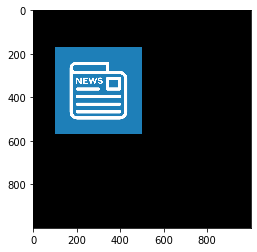

In [16]:
# Membuat gambar canvasTranslation sebagai wadah khusus untuk melakukan operasi translasi 
canvasTranslation = canvasKosong.copy()

# Menentukan besaran pergeseran
tx = -200
ty = 130

# Membuat matriks untuk transformasi translasi
T = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])

# Pengulangan untuk melakukan operasi transformasi dengan mengalikan setiap vektor di titik P dengan matriks translasi
for y in range(300, 700):
    for x in range(300, 700):
        P = np.array([x, y, 1])
        Q = T @ P
        canvasTranslation[int(Q[1]), int(Q[0])] = canvasAwal[y,x]  # memindahkan pixel di canvas lama pada koordinat (x,y) 
                                                                   # ke canvas baru pada koordinat (x',y')

plt.imshow(np.flip(canvasTranslation, 0))
plt.show()

Dari hasil percobaan di atas terlihat terjadi perpindahan posisi gambar mengikuti besaran vektor offset yang telah ditentukan, dimana nilai tx = -200 dan ty = 130 sehingga gambar bergeser ke kiri ke arah sumbu x dan bergeser ke atas ke arah sumbu y.

### 3. Rotation
Transformasi Affine untuk rotasi diberikan oleh persamaan berikut ini.<br/>
Qx = Px * cos(teta) – Py * sin(teta)<br/>
Qy = Px * sin(teta) – Py * cos(teta)<br/>

Matriks transformasinya adalah sebagai berikut:<br/>
[cos(teta), -sin(teta), 0]<br/>
[sin(teta),  cos(teta), 0]<br/>
[        0,          0, 1]

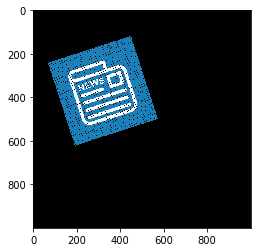

In [17]:
# Membuat gambar canvasRotation sebagai wadah khusus untuk melakukan operasi rotasi
canvasRotation = canvasKosong.copy()

# Menentukan besaran derajat rotasi
teta = np.pi*18/180   #~18 derajat

# Membuat matriks untuk transformasi rotasi
R = np.array([
    [np.cos(teta), -np.sin(teta), 0],
    [np.sin(teta), np.cos(teta), 0],
    [0, 0, 1]
])

# Pengulangan untuk melakukan operasi transformasi dengan mengalikan setiap vektor di titik P dengan matriks rotasi
for y in range(300, 700):
    for x in range(300, 700):
        P = np.array([x, y, 1])
        Q = R @ P
        canvasRotation[int(Q[1]), int(Q[0])] = canvasAwal[y,x]   # memindahkan pixel di canvas lama pada koordinat (x,y) 
                                                                 # ke canvas baru pada koordinat (x',y')

plt.imshow(np.flip(canvasRotation, 0))
plt.show()

Dari hasil percobaan di atas terlihat perputaran posisi gambar yang mengikuti besaran derajat rotasi yang telah ditentukan, dimana nilai teta = (phi*18/180) sehingga gambar berputar ke atas berlawanan arah jarum jam.

### 4. Projectives
Operasi transformasi Projectives memiliki bentuk persamaan matriks berikut:
[x']= [h11 h12 h13] [x]
[y']= [h21 h22 h23] [y]
[(1)]=[h31 h32 (1)] [(1)]

Untuk mendapatkan nilai setiap h harus ditentukan terlebih dahulu setiap pasang koordinat titik awal dan akhir.
Dengan nilai setiap pasang koordinat titik awal dan akhir yang telah ditentukan lalu dioperasikan dengan persamaan matriks berikut:<br/>
P\*H = 0<br/>
Dimana:<br/>
Pi =<br/> 
[-xi, -yi, -1, 0, 0, 0, xi\*x'i, yi\*x'i, x'i]<br/>
[0, 0, 0, -xi, -yi, -1, xi\*y'i, yi\*y'i, y'i]<br/>
dan vektor kolom<br/>
H =[0,0,0,0,0,0,0,0,1]


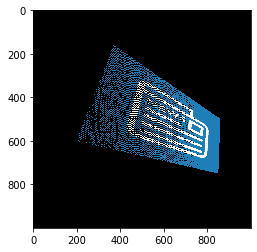

In [18]:
# Menentukan setiap koordinat(x,y) untuk titik awal dan titik tujuan
xA1, yA1, xA2, yA2, xA3, yA3, xA4, yA4 = 300, 300, 700, 300, 300, 700, 700, 700     # titik awal
xB1, yB1, xB2, yB2, xB3, yB3, xB4, yB4 = 200, 400, 850, 250, 370, 840, 860, 500     # titik tujuan

# Membuat matriks yang dibentuk dari setiap pasang koordinat titik awal dan akhir
P = np.array([
    [-xA1, -yA1, -1, 0 ,0 ,0, xA1*xB1, yA1*xB1, xB1],
    [0, 0, 0, -xA1, -yA1, -1, xA1*yB1, yA1*yB1, yB1],
    [-xA2, -yA2, -1, 0, 0, 0, xA2*xB2, yA2*xB2, xB2],
    [0, 0, 0, -xA2, -yA2, -1, xA2*yB2, yA2*yB2, yB2],
    [-xA3, -yA3, -1, 0, 0, 0, xA3*xB3, yA3*xB3, xB3],
    [0, 0, 0, -xA3, -yA3, -1, xA3*yB3, yA3*yB3, yB3],
    [-xA4, -yA4, -1, 0, 0, 0, xA4*xB4, yA4*xB4, xB4],
    [0, 0, 0, -xA4, -yA4, -1, xA4*yB4, yA4*yB4, yB4],
    [0, 0, 0, 0, 0, 0, 0, 0, 1]
])

# Membuat vektor nol untuk persamaan
H = np.array([0,0,0,0,0,0,0,0,1])

# Mendapatkan nilai untuk vektor projectives
pr = np.linalg.inv(P) @ H

# Membuat matriks untuk transformasi projectives
PR = np.reshape(pr, [3,3])

# Membuat gambar canvasProjectives sebagai wadah khusus untuk melakukan operasi proyeksi
canvasProjectives = canvasKosong.copy()

# Pengulangan untuk melakukan operasi transformasi dengan mengalikan setiap vektor di titik P dengan matriks proyeksi
for y in range(300,700):
    for x in range(300,700):
        P = np.array([x, y, 1])
        Q = PR @ P
        Q /= Q[2]
        canvasProjectives[int(Q[1]),int(Q[0])] = canvasAwal[y,x]
        
plt.imshow(np.flip(canvasProjectives, 0))
plt.show()

Dari hasil percobaan di atas terlihat gambar telah berhasil diprojeksikan, yang gambarnya berbentuk sebuah bidang yang seakan-akan menghadap sebelah kanan atas dari belakang kita. 